# $ \mbox{Asymptotic methods with SymPy}$

Projectile motion in a non-homogenous potential field is described by the equation
$$y_{tt} - \frac{1}{1 + \epsilon y} = 0,$$
with $y(0) = 0$ and $y_t(0)=1$, and where $\epsilon \ll 1$ is expected.

In [1]:
import sympy as sym
from sympy import init_printing
init_printing() 

In [2]:
y, y0, y1, y2, eps, a, b, t= sym.symbols('y y0 y1 y2 \epsilon a b t')

In [3]:
y = y0 + eps*y1 + eps**2*y2
#f = sym.lambdify(x, (), "math")

class f(sym.Function):
    
    @classmethod
    def eval(cls, x):
        return y*a - 1/(1 + eps*y)


In [4]:
the_series = sym.series(f(y),eps,x0=0, n=3)
the_series

In [5]:
by_order = sym.collect(the_series, eps, evaluate=False)
y0, y1, y2 = sym.symbols('y0 y1 y2', cls=sym.Function)

### $\mathcal{O} \left( 1 \right) \mbox{Solution}$

In [6]:
by_order[1]

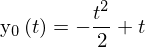

In [7]:
eqn = sym.Eq(1 + y0(t).diff(t,t))
soln0 = sym.dsolve(eqn, y0(t))
constants = sym.solve([soln0.rhs.subs(t,0) - 0, \
                      soln0.rhs.diff(t,1).subs(t,0) - 1])
C1, C2 = sym.symbols('C1 C2')
soln0 = soln0.subs(constants)
soln0

### $\mathcal{O} \left( \epsilon \right) \mbox{Solution}$

In [8]:
by_order[eps]

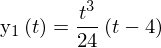

In [9]:
eqn = sym.Eq(soln0.rhs + y1(t).diff(t,t))
soln1 = sym.dsolve(eqn, y1(t))
constants = sym.solve([soln1.rhs.subs(t,0) - 0, \
                      soln1.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln1 = soln1.subs(constants)
sym.factor(soln1)

### $\mathcal{O} \left( \epsilon^2 \right) \mbox{Solution}$

In [10]:
by_order[eps**2]

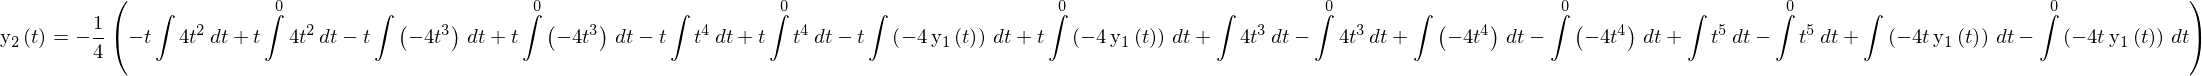

In [11]:
eqn = sym.Eq(y2(t).diff(t,t) - (soln0.rhs)**2  + y1(t))
soln2 = sym.dsolve(eqn, y2(t))
constants = sym.solve([soln2.rhs.subs(t,0) - 0, \
                      soln2.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln2 = soln2.subs(constants)
sym.factor(soln2)

### $\mbox{Composite Solution}$

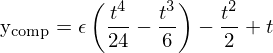

In [12]:
y_comp = sym.symbols('y_{comp}', cls=sym.Function)
y_comp = sym.Eq(y_comp, soln0.rhs + eps*soln1.rhs) # + eps**2*soln2.rhs)
y_comp

### $\mbox{Comparison}$

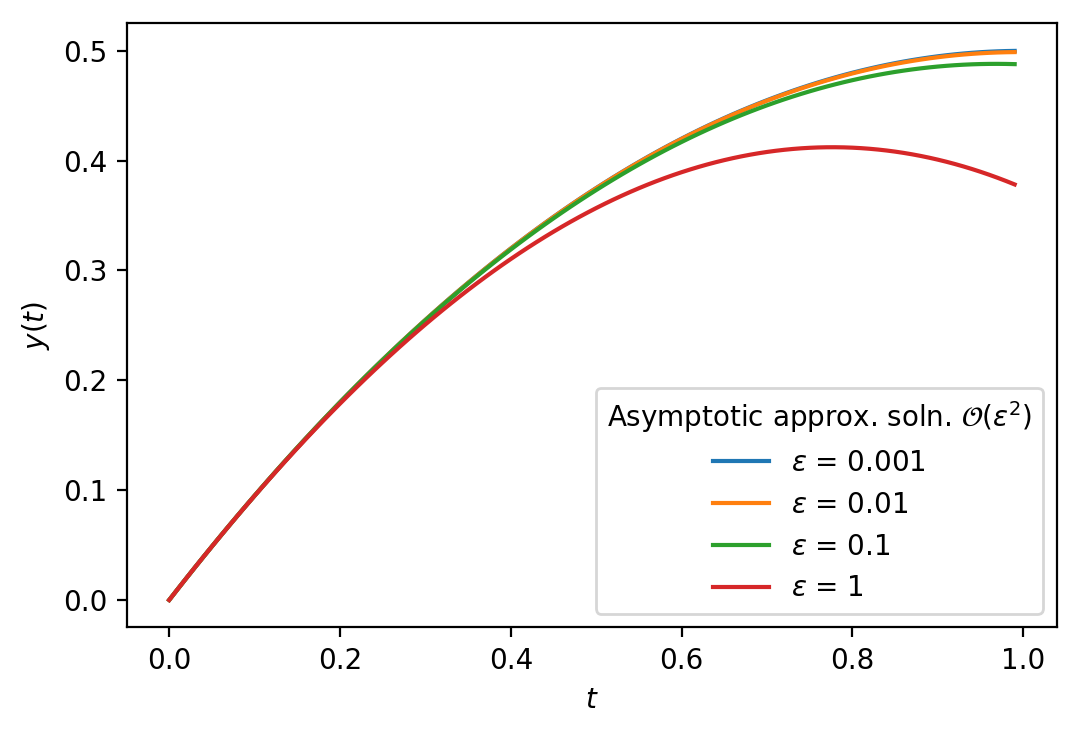

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

%config InlineBackend.figure_format = 'retina'

eps_val = [.001, .01, .1, 1]
tt = sp.arange(0,1,0.01)

plt.figure(figsize=(6, 4), dpi=100)
for vals in eps_val:
    y_compP = sym.lambdify(t, y_comp.rhs.subs(eps, vals), 'numpy')
    plt.plot(tt, y_compP(tt), label='$\epsilon$ = {}'.format(vals))
    
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.legend(title = r'Asymptotic approx. soln. $\mathcal{O} \left( \epsilon^2 \right)$')
plt.show()